<a href="https://colab.research.google.com/github/maarut001/aiml/blob/main/Assignment2_PerceptronRegressionBatchUpdateCrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bi-weekly programming Assignment-2: Perceptron, Perceptron for Regression, Batch update in Perceptron and Cross Validation

In this assignment, you will learn and implement new things about Perceptron, Perceptron for Regression, Batch update in Perceptron and Cross Validation.


**You need to solve 10 tasks: 7 coding and three conceptual/observational questions**

*For the coding tasks, read the comments carefully and implement as directed*, **You cannot change any part of the given code you are not asked about (i.e., not asked for the tasks), except for plot_scatter() (you can add styles) and for reading from the csv file (if you are running the code in colab and need to implement file mount procedures**

<h2> Code started

<h3> imports

In [1]:
import numpy as np #Matrix Operations
from sklearn.decomposition import PCA #PCA decomposition
import matplotlib.pyplot as plt #For scatter Plot
import pandas as pd #For reading from CSV

<h3> Data file

In [2]:
from_google_drive = False #False if You are using the data file given, True if you want to download from google drive

if from_google_drive == True:

  google_drive_url = "https://drive.google.com/file/d/1jPFbusU9FmJxuc_6Jrd4GtmINuacqXYP/view?usp=sharing"
  # Extract the file ID
  file_id = google_drive_url.split('/')[-2]

  # Construct the direct download URL
  download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

  file_name = download_url

elif from_google_drive == False:

  file_name = "XY_data.csv"



In [3]:
def readXYFromFile(file_name):
  """
  Read Dataframe from a csv file, return the all columns bar the last one as X_read, and the last column as Y_read
  """

  read_df = pd.read_csv(file_name)
  XY_read = read_df.to_numpy()
  X_read, Y_read = XY_read[:, :-1], XY_read[:, -1]

  return X_read, Y_read


### Implementation Task (Ungraded but important for further implementation)

These two functions need implementations from Assignment 1. This part is ungraded but necessary for later part.


In [4]:

def solveLinearRegressionEasy(X, y):

  """
  Solves the Linear System Xa = y and return a
  """
  xtx = np.matmul(X.T, X)
  xtxinv = np.linalg.inv(xtx)

  #Task 0A: write the proper expression/formula for xty and a
  xty = None
  a = None
  # Task 0A: Compute X^T y
  xty = np.matmul(X.T, y)
  # Task 0A: Compute a = (X^T X)^(-1) X^T y
  a = np.matmul(xtxinv, xty)


  return a

def MSE_error_for_Regression(a, X, y):

  """
  returns the mean squared error for Xa = y
  """

  #Task 0B: The expression below is not correct. Write the proper equation
  error = y - np.matmul(X, a)
  mse = 0.5 * np.mean(error ** 2)

  #return 0.5 * ((y - np.matmul(X, a))) incorrect expression
  return mse

### Implementation Question: (Task #1)

Task 1: k-fold Cross Validation split function implementation. This function takes features X, labels y, number of splits number_of_splits and returns a list of number_of_splits numbers of tuples in the form of (X_split,Y_split), where each tuple is a split. The implementation is done partially. You have to complete it.

In [5]:

def getKFoldCrossValidationSplits(X, y, number_of_splits):

    total_data = X.shape[0]

    np.random.seed(127)

    indices = np.arange(total_data, dtype=np.int64)
    permuted_indices = np.random.permutation(indices)

    X_permuted = X[permuted_indices]
    y_permuted = y[permuted_indices]

    splits = []

    # -----------------------------
    # TASK 1: Complete the splitting logic INSIDE the function
    # -----------------------------

    fold_size = total_data // number_of_splits  # base size

    for i in range(number_of_splits):
        start = i * fold_size

        # Last fold gets the remainder
        if i == number_of_splits - 1:
            end = total_data
        else:
            end = (i + 1) * fold_size

        X_split = X_permuted[start:end]
        Y_split = y_permuted[start:end]

        splits.append((X_split, Y_split))

    return splits





### Implementation Question: (Task #2)

Task 2: Implement k-foldCrossValidation and get error. The function here takes features X, labels y, number of splits (=K) number_of_splits, and then run K-fold-Cross validation on them. For each iteration in the range of K, it will take one split as test and others as train, run Linear Regression on the train splits. Then the MSE for both train and test splits are calculated, and then they are averaged and returned. The implementation is incomplete. Complete it.

In [6]:


def runKFoldCrossValidationLinearRegression(X, y, number_of_splits):

    splits = getKFoldCrossValidationSplits(X, y, number_of_splits)

    avg_train_MSE = 0.0
    avg_test_MSE = 0.0

    for i in range(number_of_splits):

        # Test split
        X_test_split, Y_test_split = splits[i]

        # Prepare training lists
        X_train_list = []
        Y_train_list = []

        # Collect all folds except the test fold
        for j in range(number_of_splits):
            if j != i:
                X_train_list.append(splits[j][0])
                Y_train_list.append(splits[j][1])

        # Combine training folds
        X_train_split = np.vstack(X_train_list)
        Y_train_split = np.concatenate(Y_train_list)

        # Train linear regression
        a_split = solveLinearRegressionEasy(X_train_split, Y_train_split)

        # Accumulate errors
        avg_train_MSE += MSE_error_for_Regression(a_split, X_train_split, Y_train_split)
        avg_test_MSE += MSE_error_for_Regression(a_split, X_test_split, Y_test_split)

    # Average over all K folds
    avg_train_MSE /= number_of_splits
    avg_test_MSE /= number_of_splits

    return avg_train_MSE, avg_test_MSE




# Main Code

In [7]:
X_data, y_data = readXYFromFile(file_name)
X_data.shape, y_data.shape

((100, 3), (100,))

In [8]:
splits = getKFoldCrossValidationSplits(X_data, y_data, 7)

[(X_split.shape, Y_split.shape) for (X_split, Y_split) in splits]

[((14, 3), (14,)),
 ((14, 3), (14,)),
 ((14, 3), (14,)),
 ((14, 3), (14,)),
 ((14, 3), (14,)),
 ((14, 3), (14,)),
 ((16, 3), (16,))]

In [9]:
avg_train_mse, avg_test_mse = runKFoldCrossValidationLinearRegression(X_data, y_data, 7)

In [10]:
avg_train_mse, avg_test_mse

(np.float64(0.3838498943364028), np.float64(0.4079225530477281))

### Conceptual Question:1(Task #3)

##Run these code snippets for evaluating train and test MSEs for different split sizes. Write one of your significant observations from the plot.

In [11]:
split_sizes = [5, 10, 20, 30, 40, 50,100]

train_mses, test_mses = [], []
for split_size in split_sizes:
  train_mse, test_mse = runKFoldCrossValidationLinearRegression(X_data, y_data, split_size)
  train_mses.append(train_mse)
  test_mses.append(test_mse)




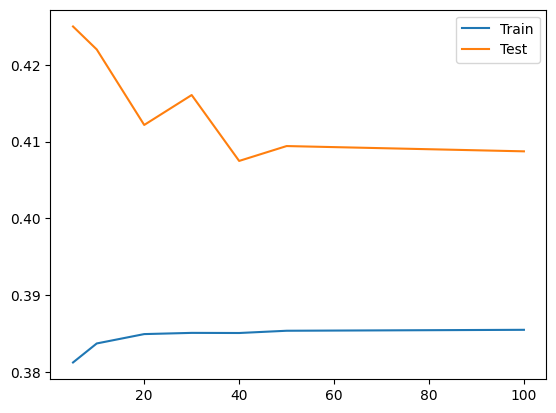

In [12]:
plt.plot(split_sizes, train_mses, label="Train")
plt.plot(split_sizes, test_mses, label="Test")
plt.legend()
plt.show()

## Write your observation here

As the split size increases, the train MSE remains almost constant and low, while the test MSE decreases slightly and stabilizes.

The model fits the training data consistently well regardless of how the dataset is split.

Evaluation on unseen data gets slightly better when more folds (smaller test sets) are used, but eventually reaches a stable accuracy.

# Perceptron

For perceptron based classification, we have levaraged our dataset in this way: we get the mean value of all y, and then the values which are greater than or equal to the mean, are considered as 1, and the rest are considered as -1

In [13]:

def getLabelsFromMeanThreshold(y):

  mean_y = y.mean()

  y_label = np.where(y >= mean_y, 1, -1)


  return y_label, mean_y


In [14]:
y_label, threshold = getLabelsFromMeanThreshold(y_data)
y_label

array([-1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,
        1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1])

### Implementation Question: (Task #4)

Task 4: Accuracy Calculation. This function takes the real labels y_real and predicted labels y_pred. Accuracy is defined as $\frac{\text{number of correct predictions}}{\text{number of predictions}}$. Implement the function

In [15]:
def getAccuracy(y_real, y_pred):


  Accuracy = None

  #YOUR IMPLEMENTATION STARTS HERE
  # Count correct predictions
  correct = np.sum(y_real == y_pred)

    # Total predictions
  total = len(y_real)

  Accuracy = correct / total





  #YOUR IMPLEMENTATION ENDS HERE

  return Accuracy


In [16]:
getAccuracy(y_label, y_label)

np.float64(1.0)

### Implementation Question: (Task #5)

Task #5: You have to complete the implementation of the *net_input* and *train* function of the classification perceptron class *SimplePerceptron*. Remember, this has a bias term unlike linear regression ($w0+w1*x1+w2*x2+w3*x3$ instead of $w1*x1+w2*x2+w3*x3$)

In [17]:
class SimplePerceptron(object):

  def __init__(self, data_size, threshold=0.0,learning_rate=0.01, epochs=50):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.threshold = threshold
    self.w_ = np.zeros((1, 1 + data_size))

  def train(self, X, y):
    for _ in range(self.epochs):
      for xi, target in zip(X, y):

        # Predict using current weights
                prediction = self.predict(xi)

                # Compute update term
                update = self.learning_rate * (target - prediction)

                # Update weights (excluding bias)
                self.w_[0, 1:] += update * xi

                # Update bias term
                self.w_[0, 0] += update




  def net_input(self, X):


    return np.dot(X,self.w_[0, 1:]) + self.w_[0,0]


  def predict(self, X):

    return np.where(self.net_input(X)>= self.threshold, 1, -1)


In [18]:
y_label, y_threshold = getLabelsFromMeanThreshold(y_data)
simple_perceptron = SimplePerceptron(X_data.shape[1], threshold=y_threshold,  learning_rate=0.01, epochs=10)



In [19]:
simple_perceptron.train(X_data, y_label)

In [20]:
y_pred = simple_perceptron.predict(X_data)

In [21]:
print("The accuracy with Simple Prediction is, {}".format(getAccuracy(y_label, y_pred)))

The accuracy with Simple Prediction is, 0.99


### Implementation Question: (Task #6)

Task #6: Complete the implementation of *SimpleRegressionPerceptron* class, inherited from *Simpleperceptron*. Instead of the labels, *predict* function is supposed to return a value.

In [22]:
class SimpleRegressionPerceptron(SimplePerceptron):

  def __init__(self, data_size, learning_rate=0.01, epochs=50):

    super().__init__(data_size, threshold=None, learning_rate=learning_rate, epochs=epochs)


  def predict(self, X):

    predicted_value = None

    #YOUR IMPLEMENTATION STARTS HERE
    predicted_value = self.net_input(X)



    #YOUR IMPLEMENTATION ENDS HERE
    return predicted_value


In [23]:
simple_regression_perceptron = SimpleRegressionPerceptron(X_data.shape[1], learning_rate=0.01, epochs=10)


In [24]:
simple_regression_perceptron.train(X_data, y_data)

In [25]:
y_pred_regr_simpl = simple_regression_perceptron.predict(X_data)

In [26]:
0.5*((y_pred_regr_simpl - y_data)**2).mean()

np.float64(0.3921997583543961)

###Write your observation here
MSE ≈ 0.392 shows the perceptron does not reach the optimal least-squares solution.
The perceptron converged quickly—additional epochs would not reduce MSE significantly.
But its accuracy is clearly lower than the optimal linear regression fit

It can approximate—but not fully optimize—linear relationships

### Implementation Question: (Task #7)

Task #7: Complete the *train()* function of the *SimpleRegressionPerceptronWithoutBias* class inherited from *SimpleRegressionPerceptron*. Here, there will be no bias term. So the weight matrix has one less element.

****

In [27]:
class SimpleRegressionPerceptronWithoutBias(SimpleRegressionPerceptron):

  def __init__(self, data_size, learning_rate=0.01, epochs=50):

    super().__init__(data_size, learning_rate=learning_rate, epochs=epochs)

    self.w_ = np.zeros((1, data_size))

  def train(self, X, y):

    for _ in range(self.epochs):
      for xi, target in zip(X, y):
        # Prediction using current weights
        prediction = self.net_input(xi)

        # Update = learning_rate * (target - prediction)
        update = self.learning_rate * (target - prediction)

        # Update weights (no bias term!)
        self.w_[0, :] += update * xi


        ##YOUR IMPLEMENTATION STARTS HERE##



        ##YOUR IMPLEMENTATION ENDS HERE##

        pass

  def net_input(self, X):

    return np.dot(X,self.w_[0,:])



In [28]:
simple_regression_perceptron_withoutBias = SimpleRegressionPerceptronWithoutBias(X_data.shape[1], learning_rate=0.01, epochs=10)
simple_regression_perceptron_withoutBias.train(X_data, y_data)
y_pred_regr_simpl_withoutbias = simple_regression_perceptron_withoutBias.predict(X_data)
0.5*((y_pred_regr_simpl_withoutbias - y_data)**2).mean()


np.float64(0.3899326942661766)

### Conceptual Question:2 (Task #8)



###Run these codes to get the weights and coefficients of Simple Regression Perceptron (with and without bias) and Linear Regression. Discuss one of your observations from these numbers.
        

In [29]:
simple_regression_perceptron.w_

array([[-0.19616933,  4.95197326,  3.9836623 ,  0.79815782]])

In [30]:
simple_regression_perceptron_withoutBias.w_

array([[5.00143135, 4.03482311, 0.86237878]])

In [31]:
solveLinearRegressionEasy(X_data, y_data)

array([5.04838482, 4.01371818, 0.9039313 ])

### Implementation Question: (Task #9)

##Here you will implement a batch version of Regression Perceptron
##Instead of calculating the update for each data point and then updating the weight for each datapoint, you will instead calculate the average amount of update for *batch_size* numbers of data point at once and update once for each batch
##For example, if 20 data is passed, then previously, for each epoch, we ran the update 20 times, one for each data point, in Simple Regression perceptron. But now, if the batch_size is set as 4, then you will run the update (20/4)=5 times, in each epoch. For every batch, you will accumulate the updates for 4 datapoints, and then average them. Then you will update the weights with the averaged updates. In this way, you will update the weights 5 times for this settings.

In [32]:
class BatchRegressionPerceptron(SimpleRegressionPerceptron):

  def __init__(self, data_size, learning_rate=0.01, epochs=50):

    super().__init__(data_size, learning_rate=learning_rate, epochs=epochs)



  def train(self, X, y, batch_size = 5):

    Xylist = list(zip(X,y))


    for _ in range(self.epochs):

      #YOUR IMPLEMENTATION STARTS HERE
      n_samples = len(Xylist)

      # Loop over batches
      for i in range(0, n_samples, batch_size):

        batch = Xylist[i : i + batch_size]
        batch_len = len(batch)

        # Accumulate updates for this batch
        sum_update_w = np.zeros_like(self.w_[0, 1:])
        sum_update_bias = 0.0

        for xi, target in batch:
          pred = self.net_input(xi)
          update = self.learning_rate * (target - pred)   # scalar

          sum_update_w += update * xi
          sum_update_bias += update

        # Average updates over the batch
        avg_update_w = sum_update_w / batch_len
        avg_update_bias = sum_update_bias / batch_len

        # Apply weight updates once per batch
        self.w_[0, 1:] += avg_update_w
        self.w_[0, 0]  += avg_update_bias



      #YOUR IMPLEMENTATION ENDS HERE

      pass



In [33]:
batch_regression_perceptron = BatchRegressionPerceptron(X_data.shape[1], learning_rate=0.01, epochs=10)


In [34]:
batch_regression_perceptron.train(X_data, y_data, batch_size=8)

In [35]:
y_pred_regr_batch = batch_regression_perceptron.predict(X_data)

In [36]:
0.5*((y_pred_regr_batch - y_data)**2).mean()

np.float64(0.9665811000971545)

### Conceptual Question:3 (Task #10)

### Run the code for *BatchRegressionPerceptron* with different batch sizes, see the plot. Write one of your observeations from the plot.

1
1 0.3921997583543961
2
2 0.42472882896855807
3
3 0.4919289829215239
4
4 0.5752413600920545
5
5 0.672583591396245
6
6 0.7686785404698945
7
7 0.8901279080816801
8
8 0.9665811000971545
9
9 1.1245921743938623
10
10 1.2213105520127854
11
11 1.369211939141397
12
12 1.3393342553124492
13
13 1.4723474844211122
14
14 1.6653411915151597
15
15 1.7036325979179197
16
16 1.7351690998231413
17
17 2.052753692235886
18
18 2.074050305488387
19
19 2.1618046714276367
20
20 2.6313204326673594


Text(0, 0.5, 'Batch MSEs')

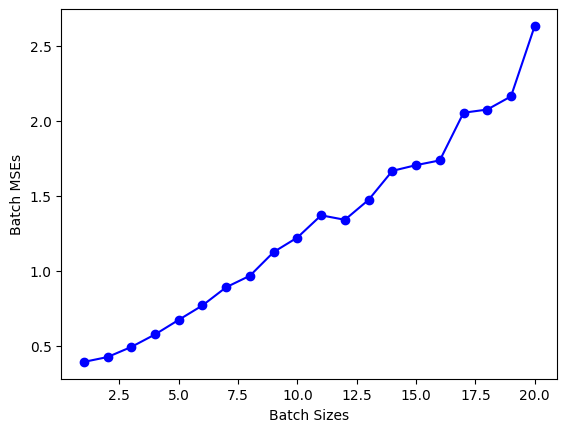

In [37]:
batch_sizes = list(range(1,21))
batch_mses = []
for batch_size in range(1,21):

  print(batch_size)
  batch_regression_perceptron = BatchRegressionPerceptron(X_data.shape[1], learning_rate=0.01, epochs=10)
  batch_regression_perceptron.train(X_data, y_data, batch_size=batch_size)
  y_pred_regr_batch = batch_regression_perceptron.predict(X_data)
  mse_error = 0.5*((y_pred_regr_batch - y_data)**2).mean()
  batch_mses.append(mse_error)
  print(batch_size, mse_error)

plt.plot(batch_sizes, batch_mses, linestyle='-', marker='o', color='blue', label='Data Points')
plt.xlabel("Batch Sizes")
plt.ylabel("Batch MSEs")

###Write your observation here

batch MSE values rise from 0.39 (batch size 1) up to 2.6+ (batch size 20).
This indicates that :

The Batch Regression Perceptron performs best with small batch sizes, and performance degrades steadily as the batch size increases.

The MSE increases steadily as batch size increases. Smaller batch sizes allow more frequent weight updates and lead to better learning, while larger batches cause underfitting and much higher errors.